In [51]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [34]:
mc=pd.read_csv("mcdonalds.csv")

In [35]:
mc.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [36]:
mc.shape

(1453, 15)

In [37]:
# Summary of the dataset
summary = mc.describe(include='all')
print(summary)


       yummy convenient spicy fattening greasy  fast cheap tasty expensive  \
count   1453       1453  1453      1453   1453  1453  1453  1453      1453   
unique     2          2     2         2      2     2     2     2         2   
top      Yes        Yes    No       Yes    Yes   Yes   Yes   Yes        No   
freq     803       1319  1317      1260    765  1308   870   936       933   
mean     NaN        NaN   NaN       NaN    NaN   NaN   NaN   NaN       NaN   
std      NaN        NaN   NaN       NaN    NaN   NaN   NaN   NaN       NaN   
min      NaN        NaN   NaN       NaN    NaN   NaN   NaN   NaN       NaN   
25%      NaN        NaN   NaN       NaN    NaN   NaN   NaN   NaN       NaN   
50%      NaN        NaN   NaN       NaN    NaN   NaN   NaN   NaN       NaN   
75%      NaN        NaN   NaN       NaN    NaN   NaN   NaN   NaN       NaN   
max      NaN        NaN   NaN       NaN    NaN   NaN   NaN   NaN       NaN   

       healthy disgusting  Like          Age VisitFrequency  Ge

In [38]:
#Convert YES/NO Responses to Binary Values
import numpy as np

# Extract first 11 columns containing the segmentation variables
md_x = mc.iloc[:, 0:11]

# Convert YES/NO to binary 1/0
md_x_binary = (md_x == 'Yes').astype(int)

# Display the first few rows to verify the transformation
print(md_x_binary.head(3))

# Check the average value of each transformed segmentation variable
print(md_x_binary.mean().round(2))


   yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  expensive  \
0      0           1      0          1       0     1      1      0          1   
1      1           1      0          1       1     1      1      1          1   
2      0           1      1          1       1     1      0      1          1   

   healthy  disgusting  
0        0           0  
1        0           0  
2        1           0  
yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [39]:
md_x.dtypes

yummy         object
convenient    object
spicy         object
fattening     object
greasy        object
fast          object
cheap         object
tasty         object
expensive     object
healthy       object
disgusting    object
dtype: object

In [40]:
# Convert all columns to numeric, forcing errors to NaN
md_x= md_x.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values (if applicable)
md_x.dropna(inplace=True)

# Convert back to numpy array if needed
md_x = md_x.to_numpy()


In [47]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'mc' is your DataFrame and it contains categorical columns
label_encoders = {}
for column in mc.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    mc[column] = le.fit_transform(mc[column])
    label_encoders[column] = le


In [49]:
# Perform one-hot encoding
mc_encoded = pd.get_dummies(mc)


In [50]:
from sklearn.preprocessing import StandardScaler

# Assuming 'mc_encoded' is your DataFrame with all numeric values
scaler = StandardScaler()
data_scaled = scaler.fit_transform(mc_encoded)

In [42]:
#Perform Principal Components Analysis (PCA)
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Perform PCA
pca = PCA()
md_pca = pca.fit_transform(md_x_binary)

# Display summary statistics for PCA components
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
print("Explained Variance by Component:", explained_variance)
print("Cumulative Explained Variance:", cumulative_variance)

# Display the factor loadings
loadings = pca.components_
print("Factor Loadings:\n", np.round(loadings, 2))

# Summary of the first two components
print(f"First two components capture {cumulative_variance[1]*100:.2f}% of the information.")


Explained Variance by Component: [0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]
Cumulative Explained Variance: [0.29944723 0.49224445 0.6252898  0.70838558 0.7678661  0.81816566
 0.86201476 0.90156255 0.93832345 0.97067674 1.        ]
Factor Loadings:
 [[-0.48 -0.16 -0.01  0.12  0.3  -0.11 -0.34 -0.47  0.33 -0.21  0.37]
 [ 0.36  0.02  0.02 -0.03 -0.06 -0.09 -0.61  0.31  0.6   0.08 -0.14]
 [-0.3  -0.06 -0.04 -0.32 -0.8  -0.06 -0.15 -0.29  0.02  0.19 -0.09]
 [ 0.06 -0.14  0.2  -0.35  0.25 -0.1   0.12 -0.    0.07  0.76  0.37]
 [-0.31  0.28  0.07 -0.07  0.36  0.11 -0.13 -0.21 -0.    0.29 -0.73]
 [ 0.17 -0.35 -0.36 -0.41  0.21 -0.59 -0.1  -0.08 -0.26 -0.18 -0.21]
 [-0.28 -0.06  0.71 -0.39  0.04 -0.09 -0.04  0.36 -0.07 -0.35 -0.03]
 [ 0.01 -0.11  0.38  0.59 -0.14 -0.63  0.14 -0.07  0.03  0.18 -0.17]
 [ 0.57 -0.02  0.4  -0.16 -0.    0.17  0.08 -0.64  0.07 -0.19 -0.07]
 [-0.11 -0.67 -0.08 -0.01  0.01  0.24  0.43  0.08

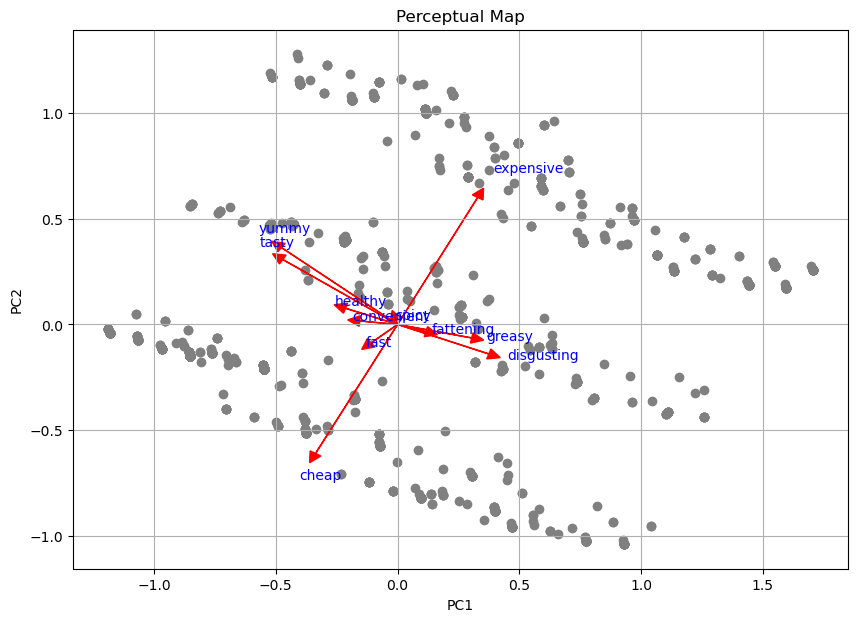

In [43]:
# Plot the first two principal components
plt.figure(figsize=(10, 7))
plt.scatter(md_pca[:, 0], md_pca[:, 1], color='grey')

# Plot the loadings as arrows
for i, (varname, loading) in enumerate(zip(md_x_binary.columns, loadings.T)):
    plt.arrow(0, 0, loading[0], loading[1], color='red', head_width=0.05, head_length=0.05)
    plt.text(loading[0] * 1.2, loading[1] * 1.2, varname, color='blue')

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Perceptual Map")
plt.grid()
plt.show()

In [54]:
# Encode categorical columns
label_encoders = {}
for column in mc.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    mc[column] = le.fit_transform(mc[column])
    label_encoders[column] = le

# Standardize features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(mc)

# Fit K-Means model
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
kmeans.fit(data_scaled)

# Get cluster centers and labels
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_

# Evaluate model
silhouette_avg = silhouette_score(data_scaled, labels)
print(f'Silhouette Score: {silhouette_avg:.3f}')

Silhouette Score: 0.210


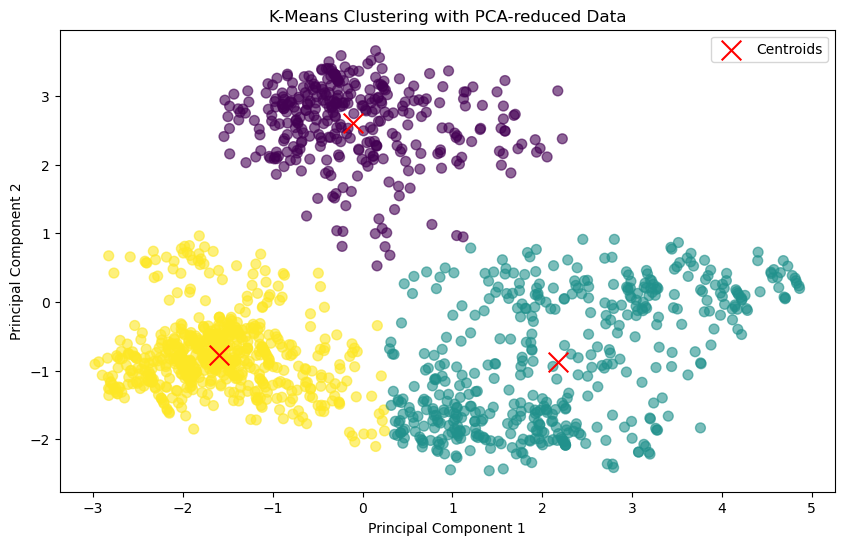

In [55]:
# For visualization, we'll reduce to 2D using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Fit k-means again on PCA-reduced data
kmeans_pca = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
kmeans_pca.fit(data_pca)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=kmeans_pca.labels_, cmap='viridis', s=50, alpha=0.6)
plt.scatter(kmeans_pca.cluster_centers_[:, 0], kmeans_pca.cluster_centers_[:, 1], 
            s=200, c='red', marker='x', label='Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering with PCA-reduced Data')
plt.legend()
plt.show()


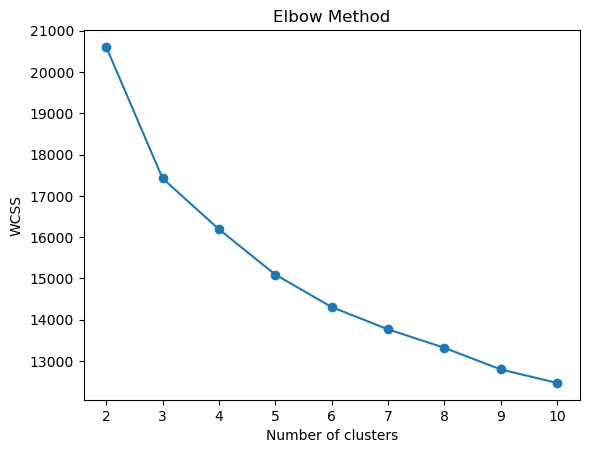

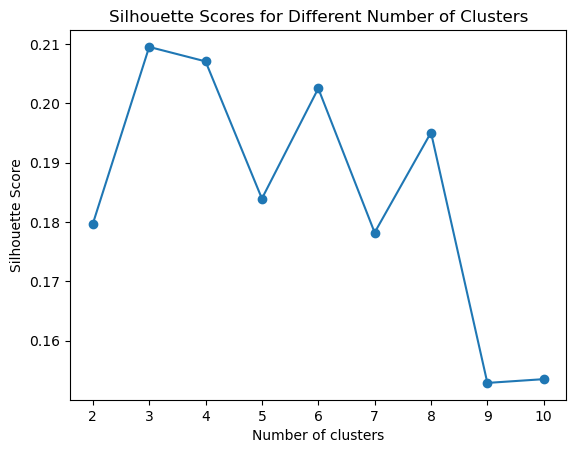

In [56]:
# Plotting Elbow Method
wcss = calculate_wcss(data_scaled, max_clusters=10)
plt.plot(range(2, 11), wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

# Plotting Silhouette Scores
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
    kmeans.fit(data_scaled)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(data_scaled, labels))

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Number of Clusters')
plt.show()
